<a href="https://colab.research.google.com/github/Yujini68/ESAA/blob/main/%EA%B3%BC%EC%A0%9C_0909.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 4 모델 훈련

## 4.1 선형 회귀

- 입력 특성의 가중치 합과 편향이라는 상수를 더해 예측을 만든다.

모델을 훈련 시킨다는 것 -> 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것 -> 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정 -> RMSE 평균 제곱근 오차를 최소화 하는 $θ$ 찾기



### 4.1.1 정규방정식

정규 방정식 : 비용 함수를 최소화하는 $θ$값을 찾기 위한 해석적인 방법

In [1]:
# 선형처럼 보이는 데이터 생성
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)),X]  #모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.53192126],
       [2.96962168]])

-> 매우 비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못함

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 X0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.53192126],
       [10.47116461]])

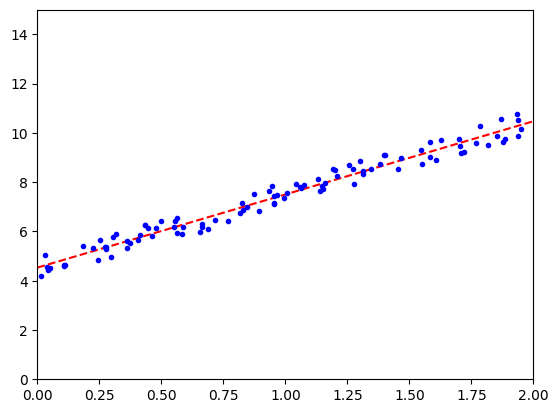

In [5]:
# 모델의 예측 그래프에 나타내기
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r--')
plt.plot(X,y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [6]:
#사이킷런에서의 선형 회귀 수행
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.53192126]), array([[2.96962168]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.53192126],
       [10.47116461]])

In [8]:
theta_best_svd, residuals,rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.53192126],
       [2.96962168]])

In [9]:
# 유사역행렬 구하기
np.linalg.pinv(X_b).dot(y)

array([[4.53192126],
       [2.96962168]])

- 특잇값 분해라 부르는 표준 행렬 분해 기법을 사용해 계산
- m < n 이거나 어떤 특성이 중복되어 X^TX 의 역행렬이 없다면 정규방정식이 작동하지 않음, 유사역행렬은 항상 구할 수 있음

### 4.1.2 계산 복잡도

역행렬을 계산

- 정규방정식이나 다른 알고리즘으로 학습된 선형 회귀 모델은 예측이 매우 빠름
- 예측 계산 복잡도는 샘플 수와 특성 수에 선형적
- 예측하려는 샘플이 두배로 늘어나면 걸리는 시간도 두배 증가

## 4.2 경사 하강법

여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘

- 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것

- $θ$를 임의의 값으로 시작해서(무작위 초기화) 한번에 조금씩 비용함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할때까지 점진적으로 향상시킴

- 중요한 파라미터 -> 스텝의 크기 -> 하이퍼파라미터로 결정됨
- 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림

문제점

- 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값 보다 덜 좋은 지역 최솟값에 수렴

- 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못함

### 4.2.1 배치 경사 하강법

편도 함수 : $θ$j가 조금 변경될 때 비요암수가 얼마나 바뀌는지 계산



In [10]:
#알고리즘으로 구현
eta = 0.1   # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 무작위 초기화

for iternation in range(n_iterations) :
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients

In [11]:
theta

array([[4.53192126],
       [2.96962168]])

적절한 학습률 찾기 -> 그리드 탐색
- 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한
- 반복 횟수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값, 허용오차보다 작아지면 경사 하강법이 거의 최솟값에 도달한 것이므로 알고리즘을 중지

### 4.2.2 확률적 경사 하강법

매 스텝에서 한개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산

- 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 훨씬 빠름
- 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련 가능

In [35]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m) :
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.54535861],
       [2.95278032]])

SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화

In [14]:
#SGDRegressor 클래스 사용
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [37]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.19932006]),
 array([ 1.07153507,  1.61772242,  0.62042365,  0.25236527,  0.25808279,
        -0.22292994,  0.04828605, -0.31128194, -0.04558761, -0.26665293,
        -0.08031365, -0.18454611, -0.08846373, -0.10105398, -0.08531117,
        -0.02934696, -0.07753055,  0.0269098 , -0.06795545,  0.0680694 ,
        -0.05778792,  0.09605778, -0.04756385,  0.11324667, -0.03755744,
         0.1219451 , -0.02794189,  0.12419134, -0.01884785,  0.12169045,
        -0.01038133,  0.11581988, -0.00262743,  0.10766406,  0.00434979,
         0.09805844,  0.01050737,  0.08763368,  0.01582251,  0.07685572,
         0.02029061,  0.06606045,  0.0239228 ,  0.05548251,  0.02674301,
         0.04527889,  0.0287852 ,  0.03554784,  0.03009071,  0.02634386,
         0.03070589,  0.01768947,  0.03068011,  0.00958425,  0.03006414,
         0.0020119 ,  0.02890877, -0.00505452,  0.02726384, -0.01164856,
         0.02517745, -0.01780747,  0.02269541, -0.02357005,  0.01986092,
        -0.02897511,  0.01671

### 4.2.3 미니배치 경사 하강법

미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산

- 행렬 연산에 최적화된 하드웨어
- GPU를 사용해서 얻는 성능 향상

## 4.3 다항 회귀

각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터 셋에 선형 모델을 훈련

2차방정식으로 비선형 데이터 생성

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.68049009])

In [17]:
X_poly[0]

array([-0.68049009,  0.46306676])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.22595074]), array([[0.9828609 , 0.47176652]]))

## 4.4 학습곡선

고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 함

- 학습 곡선: 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄 -> 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델 여러 번 훈련시키기

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)
  train_errors, val_errors = [],[]
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label = 'train set')
  plt.plot(np.sqrt(val_errors), 'b--', linewidth=3, label = 'test set')
  plt.ylim(0,3)
  plt.legend()
  plt.show()

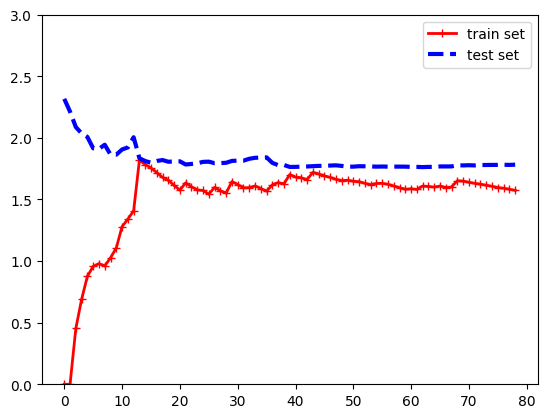

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

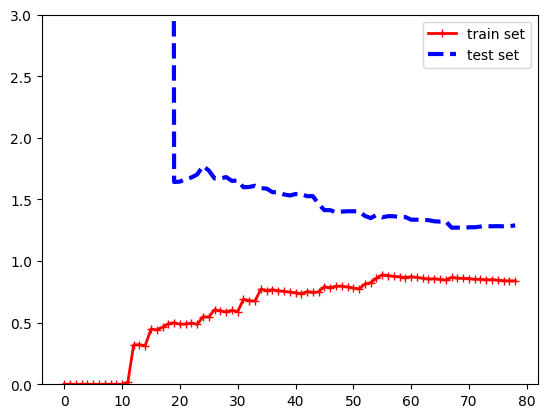

In [21]:
#10차 다항 회귀 모델의 학습곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias = False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

## 4.5 규제가 있는 선형 모델

### 4.5.1 릿지 회귀

- 규제항이 비용 함수에 추가되며, 이는 학습 알고리즘을 데이터에 맞추는 것 뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 함

- 규제항은 훈련하는 동안에만 비용 함수에 추가되며, 모델의 훈련이 끝나면 모데르이 성능을 규제가 없는 성능 지표로 평가


In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.0365954]])

In [23]:
#확률적 경사 하강법
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.04296243])

### 4.5.2 라쏘 회귀

덜 중요한 특성의 가중치를 제거하려고 함 -> 자동으로 특성 선택을 하고 희소 모델을 만듦

In [24]:
from sklearn.linear_model import Lasso
lasso_reg  = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.97813465])

### 4.5.3 엘라스틱넷

- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항: 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율을 사용해 조절
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 라쏘보다 엘라스틱넷을 선호


In [25]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.97919587])

### 4.5.4 조기 종료

조기 종료: 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것

In [26]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# 데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias = False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled,y_train.ravel())   # 훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

## 4.6 로지스틱 회귀

### 4.6.1 확률 추정

- 선형 회귀 모델과 같이 입력 특성의 가중치 합을 계산
- 편향을 더한 뒤, 선형 회귀모델과 달리 결괏값의 로지스틱(시그모이드 함수)을 출력

### 4.6.2 훈련과 비용 함수

양성 샘플(y=1)에 대해서는 높은 확률 추정, 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델이 파라미터 벡터 $\theta$를 찾기

### 4.6.3 결정 경계

붓꽃 데이터셋 사용

- 점선이 모델이 50% 확률을 추정하는 지점, 결정 경계



In [27]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [28]:
X = iris['data'][:,3:]  # 꽃잎의 너비
y = (iris["target"]==2).astype(int)  # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [29]:
#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

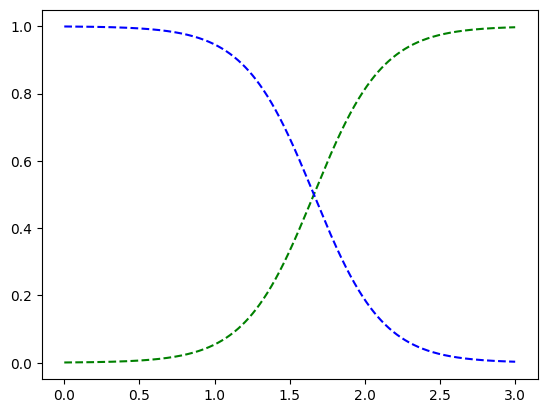

In [30]:
#꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g--', label = 'Iris virinica')
plt.plot(X_new, y_proba[:,0], 'b--', label = "Not Iris virginica")

In [31]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀(다항 로지스틱 회귀)

- 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있음

- 샘플 x가 주어지면 먼저 소프르 맥스 회귀 모델이 각 클래사 k에 대한 점수를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정

- 각 클래스는 자신만의 파라미터 벡터가 있으며, 이 벡터는 파라미터 행렬에 행으로 저장

In [32]:
X = iris['data'][:, (2,3)]  # 꽃잎 길이, 꽃잎 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class ='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [33]:
softmax_reg.predict([[5,2]])

array([2])

In [34]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])